In [1]:
import pandas as pd
from skgarden import RandomForestQuantileRegressor
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import json
from plotly.io import write_html
import plotly.express as px


C:\Users\willi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\willi\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\willi\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be remo

In [2]:
currency_btc_df = pd.read_csv('./Data/final_currency_df.csv', index_col = 'Date')

In [3]:
currency_btc_df.head()

,BTC_Price,BTC_Volume,USD/CNY_Price,USD/CNY_PCT_CHANGE,USD/EUR_Price,USD/EUR_PCT_CHANGE,USD/JPY_Price,USD/JPY_PCT_CHANGE
Date,,,,,,,,
2017-01-13,823.984009,168968000,6.9005,0.13,0.9395,-0.30,114.53,-0.17
2017-01-14,818.411987,93063296,6.9005,0.00,0.9395,0.00,114.53,0.00
2017-01-15,821.797974,71013600,6.9005,0.00,0.9395,0.00,114.53,0.00
2017-01-16,831.533997,82755200,6.9009,0.01,0.9432,0.39,114.20,-0.29
2017-01-17,907.937988,155095008,6.8546,-0.67,0.9334,-1.04,112.64,-1.37


In [4]:
currency_btc_df['BTC_Previous_Day_Close'] = currency_btc_df['BTC_Price'].shift(1)

In [5]:
currency_btc_df = currency_btc_df.dropna()

In [6]:
currency_btc_df.head()

,BTC_Price,BTC_Volume,USD/CNY_Price,USD/CNY_PCT_CHANGE,USD/EUR_Price,USD/EUR_PCT_CHANGE,USD/JPY_Price,USD/JPY_PCT_CHANGE,BTC_Previous_Day_Close
Date,,,,,,,,,
2017-01-14,818.411987,93063296,6.9005,0.00,0.9395,0.00,114.53,0.00,823.984009
2017-01-15,821.797974,71013600,6.9005,0.00,0.9395,0.00,114.53,0.00,818.411987
2017-01-16,831.533997,82755200,6.9009,0.01,0.9432,0.39,114.20,-0.29,821.797974
2017-01-17,907.937988,155095008,6.8546,-0.67,0.9334,-1.04,112.64,-1.37,831.533997
2017-01-18,886.617981,225676992,6.8390,-0.23,0.9406,0.77,114.67,1.80,907.937988


In [7]:
X = currency_btc_df.drop(columns = 'BTC_Price')

In [8]:
y = currency_btc_df['BTC_Price']

In [9]:
len(X)

1095

In [10]:
len(y)

1095

In [9]:
training_X = X[:1080]

In [10]:
training_X

,BTC_Volume,USD/CNY_Price,USD/CNY_PCT_CHANGE,USD/EUR_Price,USD/EUR_PCT_CHANGE,USD/JPY_Price,USD/JPY_PCT_CHANGE,BTC_Previous_Day_Close
Date,,,,,,,,
2017-01-14,93063296,6.9005,0.00,0.9395,0.00,114.53,0.00,823.984009
2017-01-15,71013600,6.9005,0.00,0.9395,0.00,114.53,0.00,818.411987
2017-01-16,82755200,6.9009,0.01,0.9432,0.39,114.20,-0.29,821.797974
2017-01-17,155095008,6.8546,-0.67,0.9334,-1.04,112.64,-1.37,831.533997
2017-01-18,225676992,6.8390,-0.23,0.9406,0.77,114.67,1.80,907.937988
...,...,...,...,...,...,...,...,...
2019-12-25,21559505148,6.9894,-0.26,0.9016,-0.03,109.36,-0.03,7322.532227
2019-12-26,22787010034,6.9965,0.10,0.9011,-0.06,109.64,0.26,7275.155762
2019-12-27,22777360995,6.9958,-0.01,0.8948,-0.70,109.42,-0.20,7238.966797


In [11]:
training_y = y[:1080]

In [12]:
training_y.tail()

Date
2019-12-25    7275.155762
2019-12-26    7238.966797
2019-12-27    7290.088379
2019-12-28    7317.990234
2019-12-29    7422.652832
Name: BTC_Price, dtype: float64

In [13]:
testing_X = X[1080:]

In [14]:
testing_X.head()

,BTC_Volume,USD/CNY_Price,USD/CNY_PCT_CHANGE,USD/EUR_Price,USD/EUR_PCT_CHANGE,USD/JPY_Price,USD/JPY_PCT_CHANGE,BTC_Previous_Day_Close
Date,,,,,,,,
2019-12-30,22874131671,6.9867,-0.13,0.8930,-0.20,108.88,-0.49,7422.652832
2019-12-31,21167946112,6.9632,-0.34,0.8919,-0.12,108.62,-0.24,7292.995117
2020-01-01,18565664996,6.9632,0.00,0.8919,0.00,108.70,0.07,7193.599121
2020-01-02,20802083465,6.9643,0.02,0.8950,0.35,108.58,-0.11,7200.174316
2020-01-03,28111481031,6.9655,0.02,0.8959,0.10,108.09,-0.45,6985.470215


In [15]:
testing_y = y[1080:]

In [16]:
testing_y.head()

Date
2019-12-30    7292.995117
2019-12-31    7193.599121
2020-01-01    7200.174316
2020-01-02    6985.470215
2020-01-03    7344.884277
Name: BTC_Price, dtype: float64

In [17]:
regressor = RandomForestQuantileRegressor(random_state = 0, n_estimators = 500)

In [18]:
model = regressor.fit(training_X, training_y)



In [19]:
model.score(training_X, training_y)

0.9982153130966176

In [20]:
model.score(testing_X, testing_y)

0.6783797416304844

In [21]:
print(model.feature_importances_)

[1.77463039e-03 2.41770039e-03 7.18816303e-04 4.96970570e-03
 8.82988990e-04 4.21621560e-03 1.20418107e-03 9.83815762e-01]


In [22]:
predictions = model.predict(testing_X)

In [23]:
predictions_df = pd.DataFrame(predictions)

In [24]:
upper = model.predict(testing_X, quantile = 98.5)

In [25]:
lower = model.predict(testing_X, quantile = 2.5)

In [26]:
predictions_df.head()

,0
0,7320.158898
1,7274.786218
2,7263.122067
3,7315.329376
4,7258.373429


In [27]:
actuals = pd.DataFrame(testing_y)

In [28]:
actuals.head()

,BTC_Price
Date,
2019-12-30,7292.995117
2019-12-31,7193.599121
2020-01-01,7200.174316
2020-01-02,6985.470215
2020-01-03,7344.884277


In [29]:
actuals_vs_predictions = actuals.copy()

In [30]:
actuals_vs_predictions['Predictions'] = predictions

In [31]:
actuals_vs_predictions['Upper'] = upper

In [32]:
actuals_vs_predictions['Lower'] = lower

In [40]:
actuals_vs_predictions = actuals_vs_predictions.reset_index()

In [41]:
actuals_vs_predictions

,Date,BTC_Price,Predictions,Upper,Lower
0,2019-12-30,7292.995117,7320.158898,7804.180762,6861.175872
1,2019-12-31,7193.599121,7274.786218,7554.019908,6774.552284
2,2020-01-01,7200.174316,7263.122067,7538.566168,6932.480469
3,2020-01-02,6985.470215,7315.329376,7764.364343,6965.331975
4,2020-01-03,7344.884277,7258.373429,8342.380448,6625.885328
5,2020-01-04,7410.656738,7314.965472,7555.313651,7063.797717
6,2020-01-05,7411.317383,7299.172889,7794.788301,7024.067771
7,2020-01-06,7769.219238,7300.339851,8197.689453,6792.830074
8,2020-01-07,8163.692383,7747.241075,8671.698770,7296.577637
9,2020-01-08,8079.862793,8037.937543,8744.498483,7359.420632


ValueError: 
The fig parameter must be a dict or Figure.
    Received value of type <class 'matplotlib.figure.Figure'>: Figure(1080x720)

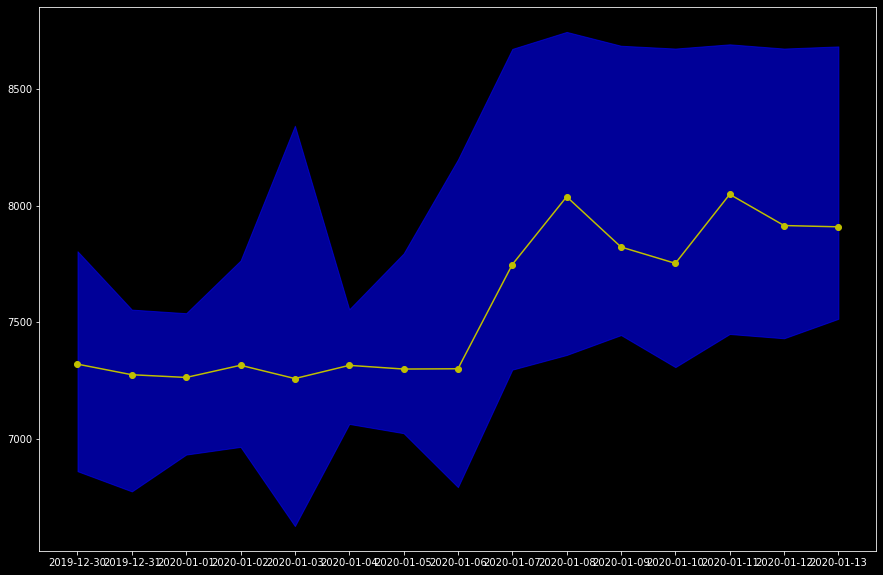

In [34]:
#plt.style.use('dark_background')
#fig = plt.figure(figsize = (15,10))
#plt.plot(actuals_vs_predictions['Predictions'], marker = 'o', color = 'y')
#plt.fill_between(actuals_vs_predictions.index, actuals_vs_predictions['Upper'], actuals_vs_predictions['Lower'], color = 'b', alpha = 0.6)
write_html(fig, './figure.html', full_html = True)


In [45]:
fig = px.line(actuals_vs_predictions, y = 'Predictions')

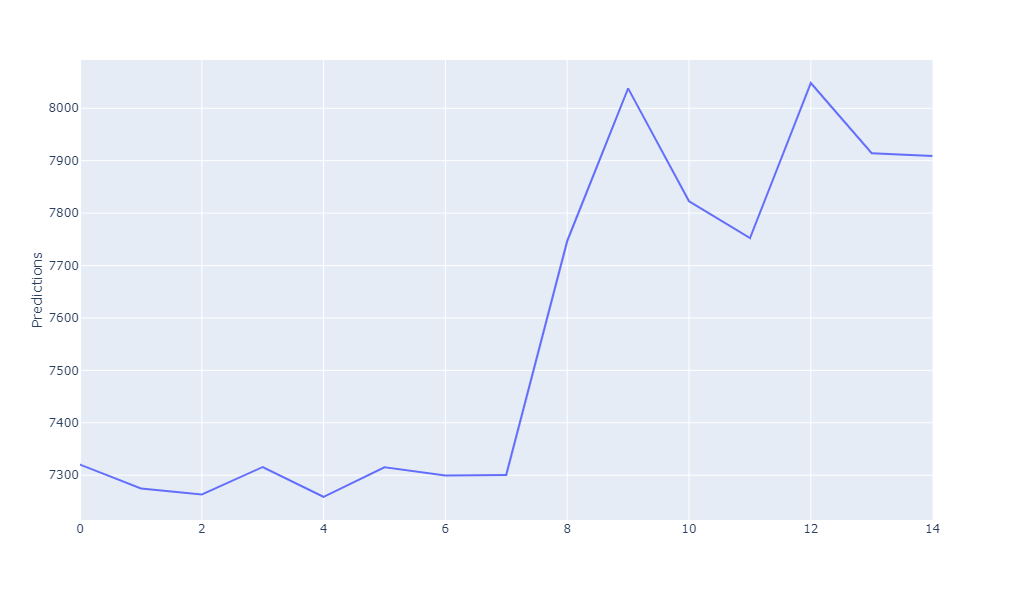

In [46]:
fig.show()

In [49]:
write_html(fig, '../web/ether.html')


AttributeError: 'str' object has no attribute 'save'